# 9. Gradient Descent: Full vs. Batch vs. Stochastic
Let's take a moment to talk about the different ways that we can perform gradient descent, and their particular advantages and disadvantages. The three basic types we will go over are:
1. **Full**
2. **Batch**
3. **Stochastic**

## 1.1 Full Gradient Descent
Up until, most of my notebooks have covered **full** gradient descent:

$$J = \sum_{n=1}^N t(n)logy(n)$$

Why is that? Well it makes sense that we would want to maximize the likelihood over our entire training set! The main disadvantage of this however is that the calculation of the gradient is now **O(N)**, since it depends on each sample. This means that it will struggle to be effective when working with big data. 

## 1.2 Stochastic Gradient Descent
On the other end of the spectrum we have **stochastic gradient descent**. This looks at one particular sample at a time, and the associated error. We are depending on the fact that all of the samples are **IID (independent and identically distributed)**. This means that in the long run your error will improve because all of your samples are coming from the same distribution. Now that we have reduced our calculation from $N$ operations to 1, that is a nice improvement, however, there is a disadvantage. Whereas the log likelihood always improves on every iteration of full gradient descent, sometimes the log likelihood can get worse with stochastic gradient descent. In fact, the cost function will behave pretty erratically over each iteration, but it will improve in the long run. 

## 1.3 Batch Gradient Descent
Batch gradient descent can be thought of as the happy medium between these two. In this method we split our data up into batches. For instance, say we have 10,000 examples, we could split it up into 100 batches of size 100. Then we could compute our cost function based on each batch for each iteration. In this case the cost function can still get worse, but it will be much less erratic than if we had done pure stochastic gradient descent. 

# 2. Full vs. Batch vs. Stochastic in Code
We are now going to compare each form of gradient descent in code, particularly how they progress. We start with the standard imports:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

from util import get_transformed_data, forward, error_rate, cost, gradW, gradb, y2indicator

We will be using the transformed data (after PCA has been applied). We will also be using logistic regression instead of a full neural network, just to speed things up. So we will start by getting the transformed data, and only take the first 300 columns. We will also normalize X, get our training and test set, and create our indicator matrices. 

Reading in and transforming data...


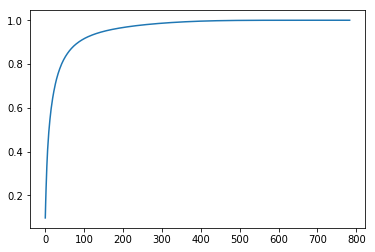

reached


In [24]:
X, Y, _, _ = get_transformed_data()
X = X[:, :300]

# normalize X first
mu = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mu) / std

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]

N, D = Xtrain.shape
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)
print('reached')

## 2.2 Full Gradient Descent
Now we will perform full gradient descent. 

In [43]:
# 1. full
W = np.random.randn(D, 10) / 28      # initialize weights and bias
b = np.zeros(10)
LL = []
lr = 0.0001                          # set learning rate and regularization
reg = 0.01
t0 = datetime.now()
for i in range(200):      
    p_y = forward(Xtrain, W, b)    # forward pass          
    
    # weight and bias update using gradient
    W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
    b += lr*(gradb(Ytrain_ind, p_y) - reg*b)


    p_y_test = forward(Xtest, W, b)    # forward pass on test set
    ll = cost(p_y_test, Ytest_ind)
    LL.append(ll)
    if i % 20 == 0:
        err = error_rate(p_y_test, Ytest)
        print("Cost at iteration %d: %.6f" % (i, ll))
        print("Error rate:", err)
p_y = forward(Xtest, W, b)                                    # final prediction
print("Final error rate:", error_rate(p_y, Ytest))            # print accuracy
print("Elapsted time for full GD:", datetime.now() - t0)      # print current time 

Cost at iteration 0: 910.510400
Error rate: 0.176
Cost at iteration 20: 332.719753
Error rate: 0.091
Cost at iteration 40: 306.519741
Error rate: 0.086
Cost at iteration 60: 297.317407
Error rate: 0.086
Cost at iteration 80: 292.984001
Error rate: 0.085
Cost at iteration 100: 290.667422
Error rate: 0.086
Cost at iteration 120: 289.344559
Error rate: 0.084
Cost at iteration 140: 288.563428
Error rate: 0.085
Cost at iteration 160: 288.097901
Error rate: 0.084
Cost at iteration 180: 287.824986
Error rate: 0.085
Final error rate: 0.084
Elapsted time for full GD: 0:00:22.994398


## 2.3 Stochastic Gradient Descent 
Now let's go over batch gradient descent. Note that we are only going to make 1 pass through the data since we are going to need to look at every sample and make an update based on every sample individually. We also are only going to go through 500 samples, since it will be very slow to go through all of them. 

In [47]:
W = np.random.randn(D, 10) / 28
b = np.zeros(10)
LL_stochastic = []
lr = 0.0001
reg = 0.01

t0 = datetime.now()
for i in range(1): # takes very long since we're computing cost for 41k samples
    tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)     # want to shuffle through the labels
    for n in range(min(N, 500)): # shortcut so it won't take so long...
        x = tmpX[n,:].reshape(1,D)   # reshape x in a 2d matrix
        y = tmpY[n,:].reshape(1,10)  # reshape y
        p_y = forward(x, W, b)       # forward pass

        # gradient weight updates, with regularization as usual 
        W += lr*(gradW(y, p_y, x) - reg*W)
        b += lr*(gradb(y, p_y) - reg*b)

        p_y_test = forward(Xtest, W, b)
        ll = cost(p_y_test, Ytest_ind)
        LL_stochastic.append(ll)
        
        # only calculate error rate once every N divided by 2 samples, will go very slow
        if n % (N//2) == 0:
            err = error_rate(p_y_test, Ytest)
            print("Cost at iteration %d: %.6f" % (i, ll))
            print("Error rate:", err)
p_y = forward(Xtest, W, b)
print("Final error rate:", error_rate(p_y, Ytest))
print("Elapsted time for SGD:", datetime.now() - t0)

Cost at iteration 0: 2471.285034
Error rate: 0.904
Final error rate: 0.897
Elapsted time for SGD: 0:00:00.477577


## 2.4 Batch Gradient Descent
The main question that usually comes up here is: "how do you select the batch?". That is done by selecting the rows from the iteration number, times the batch size, all the way to the iteration number times the batch size, plus the batch size 

In [56]:
# 3. batch
W = np.random.randn(D, 10) / 28
b = np.zeros(10)
LL_batch = []
lr = 0.0001
reg = 0.01
batch_sz = 500                  # set batch size to 500
n_batches = N // batch_sz       # get number of batches

t0 = datetime.now()
for i in range(50):
    tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)
    for j in range(n_batches):
        
        # get the current batch
        x = tmpX[j*batch_sz:(j*batch_sz + batch_sz),:]
        y = tmpY[j*batch_sz:(j*batch_sz + batch_sz),:]
        p_y = forward(x, W, b)

        # gradient descent with regularization 
        W += lr*(gradW(y, p_y, x) - reg*W)
        b += lr*(gradb(y, p_y) - reg*b)

        p_y_test = forward(Xtest, W, b)
        ll = cost(p_y_test, Ytest_ind)
        LL_batch.append(ll)
        if j % (n_batches) == 0:
            err = error_rate(p_y_test, Ytest)
            print("Cost at iteration %d: %.6f" % (i, ll))
            print("Error rate:", err)
p_y = forward(Xtest, W, b)
print("Final error rate:", error_rate(p_y, Ytest))
print("Elapsted time for batch GD:", datetime.now() - t0)


Cost at iteration 0: 2454.531419
Error rate: 0.89
Cost at iteration 1: 1115.963593
Error rate: 0.199
Cost at iteration 2: 749.115718
Error rate: 0.14
Cost at iteration 3: 607.668491
Error rate: 0.123
Cost at iteration 4: 533.966431
Error rate: 0.112
Cost at iteration 5: 488.706612
Error rate: 0.107
Cost at iteration 6: 457.420996
Error rate: 0.104
Cost at iteration 7: 434.732467
Error rate: 0.1
Cost at iteration 8: 417.336467
Error rate: 0.098
Cost at iteration 9: 403.698235
Error rate: 0.094
Cost at iteration 10: 392.327580
Error rate: 0.094
Cost at iteration 11: 383.110058
Error rate: 0.094
Cost at iteration 12: 374.876729
Error rate: 0.094
Cost at iteration 13: 368.119625
Error rate: 0.091
Cost at iteration 14: 362.484942
Error rate: 0.092
Cost at iteration 15: 357.137925
Error rate: 0.092
Cost at iteration 16: 352.425413
Error rate: 0.091
Cost at iteration 17: 348.379254
Error rate: 0.09
Cost at iteration 18: 344.558499
Error rate: 0.09
Cost at iteration 19: 341.383604
Error rate: 

## Compare
Let's take a second to compare the plots of each gradient descent variation. We can see that **stochastic** gradient descent has hardly improved at all, so we would need many more iterations. If we then look at **full** gradient descent, it appears to have converged faster than **batch** gradient descent, but it all ran slower. 

Now, if you zoom into the batch and stochastic curves you will see that they are not always smooth, whereas full gradient descent is. 

<IPython.core.display.Javascript object>


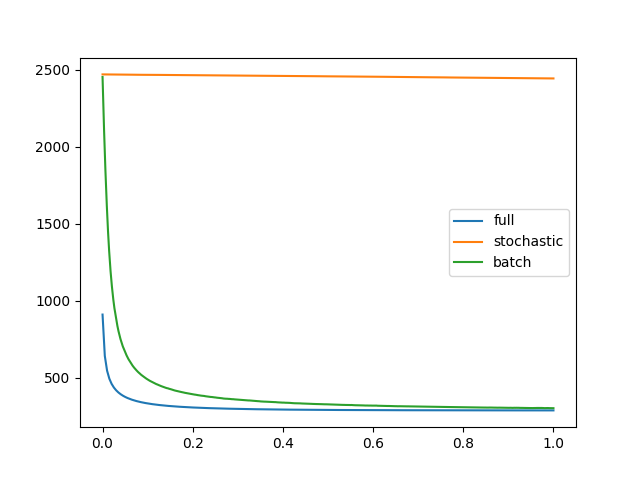

In [60]:
%matplotlib notebook
x1 = np.linspace(0, 1, len(LL))
plt.plot(x1, LL, label="full")
x2 = np.linspace(0, 1, len(LL_stochastic))
plt.plot(x2, LL_stochastic, label="stochastic")
x3 = np.linspace(0, 1, len(LL_batch))
plt.plot(x3, LL_batch, label="batch")
plt.legend()
plt.show()